In [56]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
pd.set_option('display.max_columns', 50)
import re
import timeit
import random
random.seed(3)
import seaborn as sns
from tqdm.notebook import tqdm

In [58]:
df = pd.read_csv('train_indessa.csv')
print(df.columns)
df

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,,12.49,B,B5,Registered Nurse,10+ years,MORTGAGE,75000.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,481xx,MI,14.53,0.0,0.0,NaN,51.0,12.0,1.0,15775.0,63.6,34.0,f,2595.45,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,65th week,0.0,0.0,83087.0,24800.0,0
532424,29403184,12000,12000,12000.0,60 months,BAT2003848,14.99,C,C5,Account Mgr,10+ years,MORTGAGE,59000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,496xx,MI,22.97,0.0,0.0,NaN,81.0,10.0,1.0,9453.0,53.1,29.0,w,2182.92,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,70th week,0.0,0.0,227812.0,17800.0,0
532425,7357607,18725,18725,18725.0,60 months,NaN,20.80,E,E1,Comcast cable,8 years,RENT,42504.0,Verified,n,NaN,debt_consolidation,Debt consolidation,370xx,TN,27.27,0.0,1.0,26.0,NaN,14.0,0.0,12085.0,49.9,26.0,f,645.32,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,26010.0,24200.0,1
532426,23182668,21000,21000,21000.0,60 months,BAT3193689,16.29,D,D2,Resident Physician,1 year,RENT,50000.0,Source Verified,n,NaN,credit_card,Credit card refinancing,432xx,OH,14.91,0.0,1.0,NaN,NaN,7.0,0.0,20902.0,89.7,14.0,w,4619.79,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,78th week,0.0,0.0,29197.0,23300.0,0


In [60]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [62]:
df[['member_id','loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'pymnt_plan','grade','emp_length'
       ,'batch_enrolled', 'int_rate', 'grade', 'emp_title', 'home_ownership', 'annual_inc', 
       'purpose', 'zip_code','total_rec_int','tot_cur_bal','loan_status']]


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,pymnt_plan,grade,emp_length,batch_enrolled,int_rate,grade,emp_title,home_ownership,annual_inc,purpose,zip_code,total_rec_int,tot_cur_bal,loan_status
0,58189336,14350,14350,14350.0,36 months,n,E,9 years,,19.19,E,clerk,OWN,28700.0,debt_consolidation,349xx,1173.84,28699.0,0
1,70011223,4800,4800,4800.0,36 months,n,B,< 1 year,BAT1586599,10.99,B,Human Resources Specialist,MORTGAGE,65000.0,home_improvement,209xx,83.95,9974.0,0
2,70255675,10000,10000,10000.0,36 months,n,A,2 years,BAT1586599,7.26,A,Driver,OWN,45000.0,debt_consolidation,447xx,56.47,38295.0,0
3,1893936,15000,15000,15000.0,36 months,n,D,10+ years,BAT4808022,19.72,D,Us office of Personnel Management,RENT,105000.0,debt_consolidation,221xx,4858.62,55564.0,0
4,7652106,16000,16000,16000.0,36 months,n,B,10+ years,BAT2833642,10.64,B,LAUSD-HOLLYWOOD HIGH SCHOOL,RENT,52000.0,credit_card,900xx,2296.41,47159.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,20000,20000,20000.0,36 months,n,B,10+ years,,12.49,B,Registered Nurse,MORTGAGE,75000.0,debt_consolidation,481xx,2595.45,83087.0,0
532424,29403184,12000,12000,12000.0,60 months,n,C,10+ years,BAT2003848,14.99,C,Account Mgr,MORTGAGE,59000.0,debt_consolidation,496xx,2182.92,227812.0,0
532425,7357607,18725,18725,18725.0,60 months,n,E,8 years,NaN,20.80,E,Comcast cable,RENT,42504.0,debt_consolidation,370xx,645.32,26010.0,1
532426,23182668,21000,21000,21000.0,60 months,n,D,1 year,BAT3193689,16.29,D,Resident Physician,RENT,50000.0,credit_card,432xx,4619.79,29197.0,0


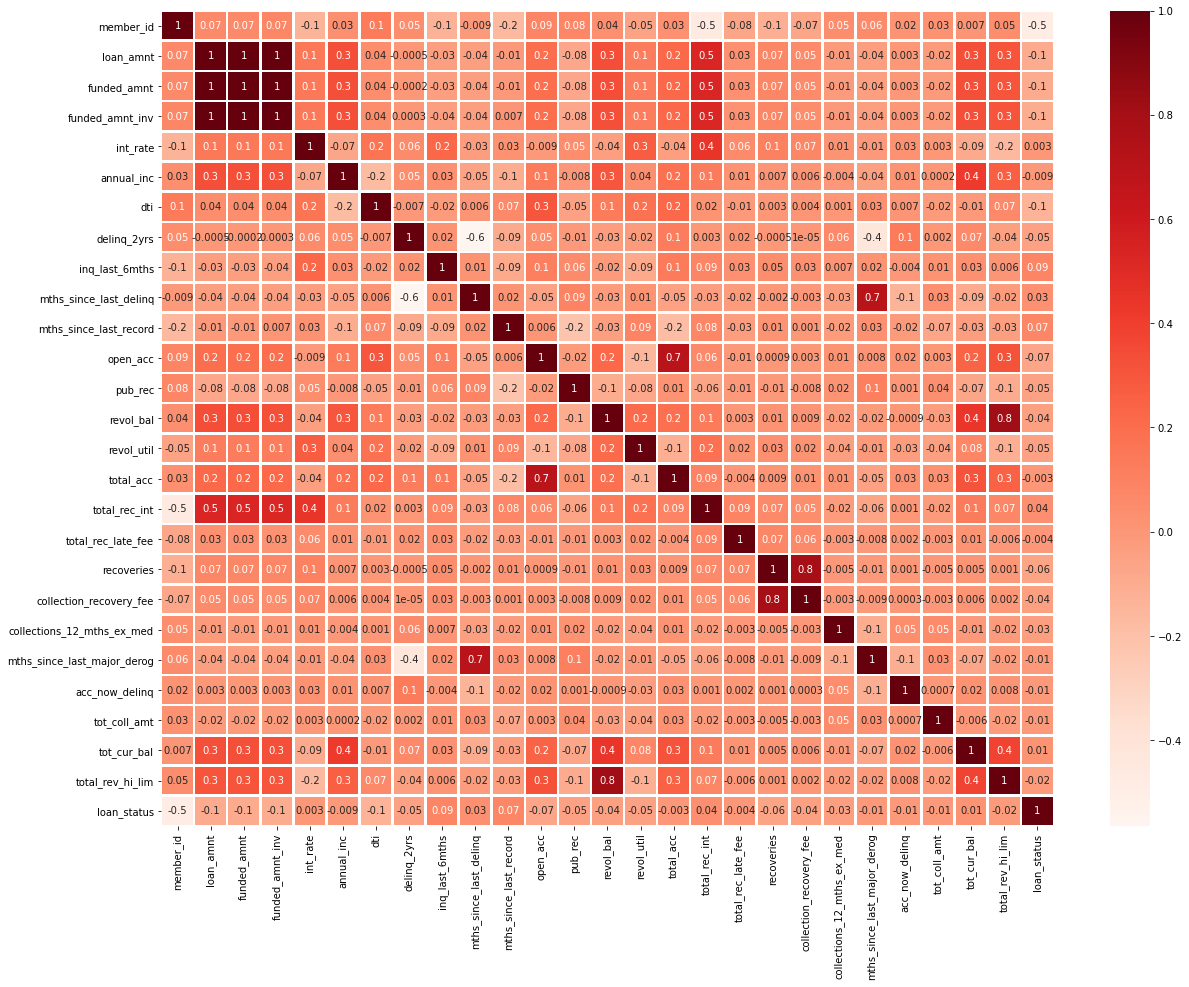

In [64]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(data = df.corr(),annot=True, linewidths=1.5, fmt='.1g',cmap=plt.cm.Reds)
plt.show()

In [65]:
df = df[['funded_amnt_inv', 'term', 'int_rate', 'home_ownership', 'annual_inc','total_rec_int','tot_cur_bal','loan_status']]
df = df.dropna()
df

,funded_amnt_inv,term,int_rate,home_ownership,annual_inc,total_rec_int,tot_cur_bal,loan_status
0,14350.0,36 months,19.19,OWN,28700.0,1173.84,28699.0,0
1,4800.0,36 months,10.99,MORTGAGE,65000.0,83.95,9974.0,0
2,10000.0,36 months,7.26,OWN,45000.0,56.47,38295.0,0
3,15000.0,36 months,19.72,RENT,105000.0,4858.62,55564.0,0
4,16000.0,36 months,10.64,RENT,52000.0,2296.41,47159.0,0
...,...,...,...,...,...,...,...,...
532423,20000.0,36 months,12.49,MORTGAGE,75000.0,2595.45,83087.0,0
532424,12000.0,60 months,14.99,MORTGAGE,59000.0,2182.92,227812.0,0
532425,18725.0,60 months,20.80,RENT,42504.0,645.32,26010.0,1
532426,21000.0,60 months,16.29,RENT,50000.0,4619.79,29197.0,0


In [66]:
#clean up term
#replace 36 monoths/60 months with 36/60 and convert string into integer 
df['term'] = df['term'].apply(lambda x: np.int(x[:2]))
target= df['loan_status'].values
df.drop('loan_status', axis = 1, inplace = True)

The `home_ownership` feature contains 6 categories: `OWN`, `MORTGAGE`, `RENT`, `OTHER`, `NONE`, `ANY`. We transform this feature into 6 binary features using the `OneHotEncoder` that we import from the `sklearn.preprocessing` submodule. In other words, each category gets transformed into a new feature and gets a "1" or "0" if the loan belongs to that home ownership category or not. To be more concrete, the following mapping is produced:
```
OWN      ==> 1 0 0 0 0 0
MORTAGE  ==> 0 1 0 0 0 0 
RENT     ==> 0 0 1 0 0 0
...

```

In [67]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(df.values))
y = target

For the remainder of this notebook, we split our data into a training set and a test set using the `train_test_split` function from `sklearn.model_selection`. 

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33)
X_train.shape[0] == y_train.shape[0]



True

Let us try to fit our dataset to a decision tree classifier. 

In [69]:
from sklearn import tree
regressor = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)
regressor = regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

metrics.accuracy_score(y_test, y_pred)

0.8294920909540286

an accuracy of 0.83 sounds pretty good! But keep in mind that our dataset is quite unbalanced. 80% of our data belong to clients that did not default on their loans, and 20% did default. If we made a simple model that always makes the prediction that a client will not default, no matter what, it will still have an accurace of 80%. 

the decision tree classifier does perform slighty better, so that suggests that it can predict some of the clients that defaulted on their loans. One metric that provides some insight is called the *confusion matrix*, whose elements say something about how often the model predicts different labels correctly or incorrectly. It has four components:

- **true negatives**, which is the number of times a 0 was predicted and was **correct**
- **false negatives**, which is the number of times a 0 was predicted and was **incorrect**
- **true positives**,  which is the number of times a 1 was predicted and was **correct**
- **false positives**, which is the number of times a 1 was predicted and was **incorrect**

and these numbers are usually presented in a table form:

```
TN  FP
FN  TP,

```
called the *confusion matrix*. Using the components of the confusion matrix we can construct two metrics called the *precision* and *recall*:

```
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
```

precision answers the question "of all the defaults the model predicts, which fraction of them was correct?", whereas recall answers the question "of all the defaults in the test-dataset, which fraction was correctly identified as default?". Suppose the model predicts that **every** client in the test-set will default, in other words it did not miss any clients that defaults, the recall will be equal to 1. But precision on the other hand is only 20% (in this case equal to accuracy). Now suppose that the model only predicts that a single client will default, and is correct. Precision will now be equal to 1, because of all the defaults it predicts, it did so correctly, whereas recall will now be equal to 0. 

One question that comes to mind, is which metric is more meaningful? Well this entire depends on the business problem. 

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    display(pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1'], 
            columns=['Pred 0', 
                            'Pred 1']))
    print("accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("precision: {}".format(precision_score(y_test, y_pred)))
    print("recall: {}".format(recall_score(y_test, y_pred)))
    
conf_matrix(y_test,y_pred)

,Pred 0,Pred 1
True 0,TN = 127726 (TNR = 97.37%),FP = 3444 (FPR = 2.63%)
True 1,FN = 24151 (FNR = 78.74%),TP = 6519 (TPR = 21.26%)


accuracy: 0.8294920909540286
precision: 0.654320987654321
recall: 0.21255298337137268


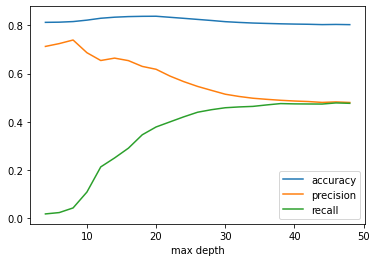

In [71]:
accuracies = []
precisions = []
recalls = []
depths = list(range(4,50,2))
for d in tqdm(depths):
    regressor = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
    regressor = regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots()
axs.plot(depths, accuracies, label = "accuracy")
axs.plot(depths, precisions, label = "precision")
axs.plot(depths, recalls, label = "recall")

axs.set_xlabel("max depth")
plt.legend()
plt.show()


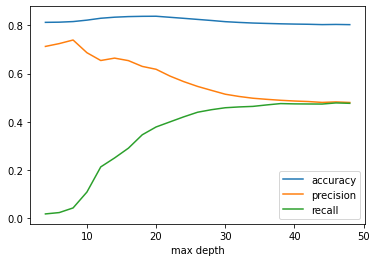

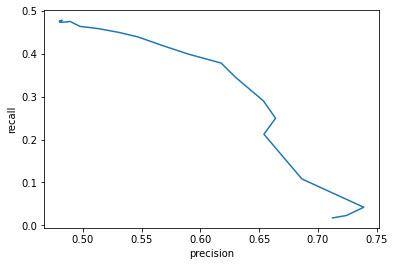

In [72]:
fig, axs = plt.subplots()
axs.plot(depths, accuracies, label = "accuracy")
axs.plot(depths, precisions, label = "precision")
axs.plot(depths, recalls, label = "recall")

axs.set_xlabel("max depth")
plt.legend()
plt.show()

plt.plot(precisions, recalls)
plt.xlabel("precision")
plt.ylabel("recall")
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score

def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    display(pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1'], 
            columns=['Pred 0', 
                            'Pred 1']))
    print("precision: {}".format(precision_score(y_test, y_pred)))
    print("recall: {}".format(recall_score(y_test, y_pred)))
    
conf_matrix(y_test,y_pred)

,Pred 0,Pred 1
True 0,TN = 115334 (TNR = 87.93%),FP = 15836 (FPR = 12.07%)
True 1,FN = 16059 (FNR = 52.36%),TP = 14611 (TPR = 47.64%)


precision: 0.47988307550826026
recall: 0.4763938702314966


In [74]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
def scores(y_test, y_pred):
    print("precision: {}".format(precision_score(y_test, y_pred)))
    print("recall: {}".format(recall_score(y_test, y_pred)))
scores(y_test, y_pred)

precision: 0.47988307550826026
recall: 0.4763938702314966


In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [76]:
# Initialize ANN
ann = tf.keras.models.Sequential()

#Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))

#Adding the input layer and the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

#Adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [77]:
# Compiling the ANN
#loss function = shape of the curve, optimizer = minimize the loss function
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [78]:
# Training the ANN 
# epochs: the number of time you train ANN in the entire dataset, in this example, 100. batch_size = 32=> in each epoch, numbers of batches will be number of observations in the trainingset/32
ann.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
10269/10269 [==============================] - 20s 2ms/step - loss: 0.4676 - accuracy: 0.8092 - recall_2: 0.0038 - precision_2: 0.1764
Epoch 2/10
10269/10269 [==============================] - 21s 2ms/step - loss: 0.4598 - accuracy: 0.8119 - recall_2: 3.0728e-04 - precision_2: 0.8636
Epoch 3/10
10269/10269 [==============================] - 20s 2ms/step - loss: 0.4587 - accuracy: 0.8119 - recall_2: 4.5283e-04 - precision_2: 0.8000
Epoch 4/10
10269/10269 [==============================] - 19s 2ms/step - loss: 0.4581 - accuracy: 0.8119 - recall_2: 3.8814e-04 - precision_2: 0.8000
Epoch 5/10
10269/10269 [==============================] - 21s 2ms/step - loss: 0.4576 - accuracy: 0.8119 - recall_2: 3.8814e-04 - precision_2: 0.7273
Epoch 6/10
10269/10269 [==============================] - ETA: 0s - loss: 0.4576 - accuracy: 0.8119 - recall_2: 6.6442e-04 - precision_2: 0.7321  ETA: 1 - 20s 2ms/step - loss: 0.4576 - accuracy: 0.8119 - recall_2: 6.6308e-04 - precision_2: 0.7321
Epoch 7

In [81]:
df_class_0_under = df[target==0].sample(92503)

In [82]:
df_undersample = pd.concat([df_class_0_under, df[target==1]], axis=0)

In [83]:
df_undersample

,funded_amnt_inv,term,int_rate,home_ownership,annual_inc,total_rec_int,tot_cur_bal
108264,11000.0,36,6.24,MORTGAGE,59000.0,109.14,190017.0
178014,12000.0,36,13.66,MORTGAGE,36500.0,1515.22,33340.0
78253,10000.0,36,16.59,RENT,75000.0,2282.84,40574.0
228257,28000.0,36,6.49,RENT,122500.0,2123.88,50424.0
130196,4950.0,36,15.61,RENT,28000.0,438.36,54730.0
...,...,...,...,...,...,...,...
532405,18000.0,60,17.27,RENT,62000.0,4778.11,68068.0
532411,20000.0,36,9.67,MORTGAGE,78000.0,2295.31,166357.0
532420,5700.0,36,14.16,OWN,37000.0,67.26,89997.0
532422,10000.0,36,14.33,MORTGAGE,49900.0,569.12,189233.0


In [102]:
x0 = X_train[y_train==0]
x1 = X_train[y_train==1]

np.random.shuffle(x0)
x0 = x0[:62256]
x_train_downsample = np.concatenate([x0, x1])
y_train_downsample = np.concatenate([62256*[0], 62256*[1]])

In [104]:
x_train_downsample.shape


(124512, 12)

In [105]:
y_train_downsample.shape

(124512,)

In [112]:
ann.fit(x_train_downsample, y_train_downsample, batch_size = 80, epochs = 10)

Epoch 1/10
1557/1557 [==============================] - 4s 3ms/step - loss: 0.6453 - accuracy: 0.6274 - recall_2: 0.6609 - precision_2: 0.6194
Epoch 2/10
1557/1557 [==============================] - 4s 3ms/step - loss: 0.6452 - accuracy: 0.6270 - recall_2: 0.6594 - precision_2: 0.6193
Epoch 3/10
1557/1557 [==============================] - 4s 3ms/step - loss: 0.6453 - accuracy: 0.6277 - recall_2: 0.6604 - precision_2: 0.6199
Epoch 4/10
1557/1557 [==============================] - 4s 3ms/step - loss: 0.6453 - accuracy: 0.6276 - recall_2: 0.6609 - precision_2: 0.6196
Epoch 5/10
1557/1557 [==============================] - 4s 3ms/step - loss: 0.6453 - accuracy: 0.6281 - recall_2: 0.6591 - precision_2: 0.6206
Epoch 6/10
1557/1557 [==============================] - 4s 3ms/step - loss: 0.6453 - accuracy: 0.6271 - recall_2: 0.6589 - precision_2: 0.6195
Epoch 7/10
1557/1557 [==============================] - 4s 3ms/step - loss: 0.6452 - accuracy: 0.6277 - recall_2: 0.6590 - precision_2: 0.6201

In [113]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.55)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [114]:
conf_matrix(y_test,y_pred)

,Pred 0,Pred 1
True 0,TN = 93626 (TNR = 71.15%),FP = 37967 (FPR = 28.85%)
True 1,FN = 14325 (FNR = 47.36%),TP = 15922 (TPR = 52.64%)


precision: 0.2954591846202379
recall: 0.5263993123284954


C:\Users\lcu1812\Anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


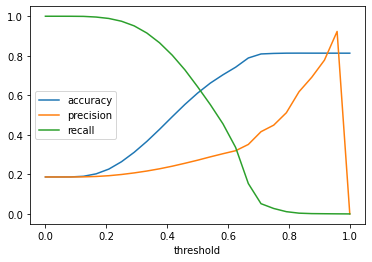

In [109]:
accuracies = []
precisions = []
recalls = []
thresholds = np.linspace(0,1,25)
for t in tqdm(thresholds):

    y_pred = ann.predict(X_test)
    y_pred = (y_pred > t)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots()
axs.plot(thresholds, accuracies, label = "accuracy")
axs.plot(thresholds, precisions, label = "precision")
axs.plot(thresholds, recalls, label = "recall")

axs.set_xlabel("threshold")
plt.legend()
plt.show()


Text(0, 0.5, 'recall')

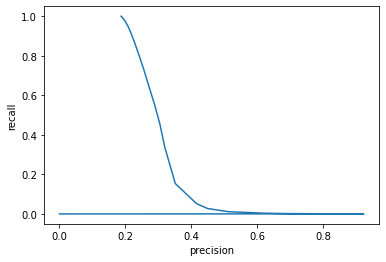

In [116]:
plt.plot(precisions, recalls)
plt.xlabel("precision")
plt.ylabel("recall")

In [ ]:
accuracies = []
precisions = []
recalls = []
depths = list(range(4,50,2))
for d in tqdm(depths):
    regressor = tree.DecisionTreeClassifier(criterion='entropy', max_depth=d)
    regressor = regressor.fit(x_train_downsample, y_train_downsample)

    y_pred = regressor.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots()
axs.plot(depths, accuracies, label = "accuracy")
axs.plot(depths, precisions, label = "precision")
axs.plot(depths, recalls, label = "recall")

axs.set_xlabel("max depth")
plt.legend()
plt.show()


In [ ]:
plt.plot(precisions, recalls)
plt.xlabel("precision")
plt.ylabel("recall")
plt.show()